# Lab 8: Define and Solve an ML Problem of Your Choosing

In [26]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [27]:
stars_data_name = pd.read_csv("Stars.csv", header=0)
df = pd.DataFrame(stars_data_name)# YOUR CODE HERE

df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [28]:
# also a dictionary for the already encoded values for the label that we will be predicting 
star_type_codes = {'Red Dwarf':0, 'Brown Dwarf':1, 'White Dwarf':2,'Main Sequence':3, 'Super Giant':4, 'Hyper Giant':5,}

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

We are using the Stars.csv dataset to classifiy the type of the star from 0-5 which is ranked by hotness of the star. The label we are predicting is the star type, and the features are temperature (Kelvin), L-luminosity, R-radius, A_M-absolute magnitude, and color which we will be hot encoding due to verbal values. Classifying stars here is a supervised learning multi-class classification problem which can help in astronomy where when data comes in about the features of the star, we can classify what type of star it is. Star classification can be further applied to possibly clustering stars based on location as to where the star data came from or other factors. For now, the problem being solved is a multi-class classification problem for one of 6 (0-5) star types classified into Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants based on the number that was one-hot encoded in the data. To create the classification problem, we can test many models such as K-nearest neighbors, decision tree, or a neural network. We will start with a KNN model as it is simple to first test. 



The data is from Kaggle.com from NASA, the data has been one-hot-encoded and is already ready for use. 

Here is additonal information: 
from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5


MATH:

Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [29]:
# YOUR CODE HERE
print(df.shape)
print(list(df.columns))
print(np.sum(df.isnull(), axis = 0))
print(df.isnull().values.any())
print(df.dtypes)
print(df.describe)

(240, 7)
['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64
False
Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object
<bound method NDFrame.describe of      Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...          

In [30]:
# encode colors and spectral class in the data for clarity 

print(df['Color'].unique())
print(df['Spectral_Class'].unique())
print(df['Color'].value_counts())
print(df['Spectral_Class'].value_counts())

# dummy dataset for encoding, probably not going to exactly use one-hot encoding because there would be too many columns then 

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
['M' 'B' 'A' 'F' 'O' 'K' 'G']
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64


In [31]:
# change color because we will use it as a feature 
# change spectral class because we will use it as numeric feature too 
# we will copy the dataframe in case we want to use the original df for another model 
spectral_codes = {'M':0, 'B':1, 'O':2, 'A':3, 'F':4, 'K':5, 'G':6 } 
color_codes = {'Red':0, 'Blue White':1, 'White':2, 'Yellowish White':3, 'Blue white':4, 'Pale yellow orange':5, 'Blue':6, 'Blue-white':7, 'Whitish':8, 'yellow-white':9, 'Orange':10, 'White-Yellow':11, 'white':12, 'yellowish':13, 'Yellowish':14, 'Orange-Red':15, 'Blue-White':16}
df2 = df.copy() #copy original dataframe

# map them 
df2['Color'] = df2['Color'].map(color_codes)
df2['Spectral_Class'] = df2['Spectral_Class'].map(spectral_codes)

print(df2['Color'].unique())
print(df2['Spectral_Class'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[0 1 3 4 2 5 6]


In [32]:
# class imbalance 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

----------------------------------------------------------------
I have two different data frames, one with encoded object values, and one without for the classification problem. I decided not to use one hot enconding because that would have led to too many columns and more confusion, so I just mapped the unique column values to integer numbers. I checked and verified for no null or empty values.  

First, I am starting with a K Nearest Neighbors model with the same features and label but with the encoded values. I will also try a Decision Tree and compare the results. Both KNN and DT models can work well for multi-class classification problems. However, if I want to make the most accurate model, I may try neutral networks. With the neural network, I will test it with both with the original dataframe without the encoded values and the encoded dataframe to ensure that the results won't be that different with using the mapping method to change the object values to numeric values. I am trying to avoid decimal values so integers must be used. Both dataframes were originally cleaned up and ready for use to begin with. 

I will split the data into the train and test sets and then have a validation set as well. 

From the model, I will make some figures to compare the accuracy of the predictions vs the training set. 



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [33]:
# YOUR CODE HERE

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# for DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# for NN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages


In [34]:
# callback clcass for the NN model 

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [35]:
# YOUR CODE HERE
# KNN Model 1, using df 2 with the knn model 
X = df2.drop(columns = 'Type', axis = 1)
y = df2['Type']

In [36]:
# split data for KNN model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=1234)

# initialize model 
KNNmodel = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training sets
KNNmodel.fit(X_train, y_train)

# Make predictions on the test set
prediction= KNNmodel.predict(X_test)
print(prediction)

#accuracy
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))


[5 4 3 5 1 0 2 1 2 0 2 4 2 1 5 0 0 4 2 5 4 5 4 4 0 5 2 0 0 3 2 4 4 2 1 4 0
 2 0 3 4 3 5 1 5 2 2 1]
Accuracy score of model: 0.7291666666666666


In [37]:
# test for different k_values
def train_test_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score
    
k_values = [2, 3, 5, 10, 50, 100, 150]
acc1 = []
for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))


# k=3 yields the highest accuracy score for the model 

k=2, accuracy score: 0.6666666666666666
k=3, accuracy score: 0.75
k=5, accuracy score: 0.6458333333333334
k=10, accuracy score: 0.6041666666666666
k=50, accuracy score: 0.5
k=100, accuracy score: 0.375
k=150, accuracy score: 0.16666666666666666


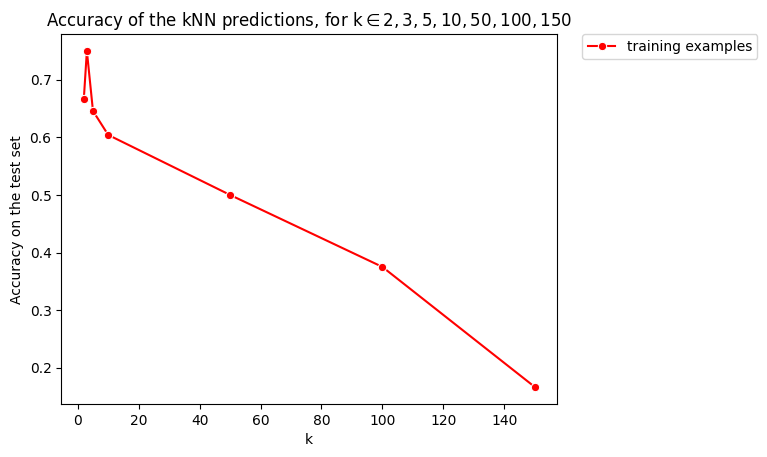

In [38]:
 # visualize results 
fig = plt.figure()

ax = fig.add_subplot(111)

sns.lineplot(x=k_values, y=acc1, color='r', marker='o', label = 'training examples')
plt.title('Accuracy of the kNN predictions, for k$\in{2, 3, 5, 10, 50, 100, 150}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()


Here are screenshots of results and figures in case there is any error with running the file. 

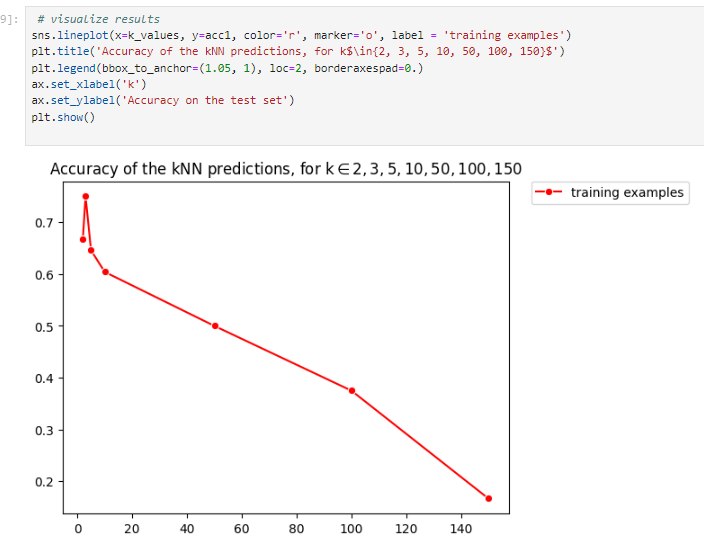

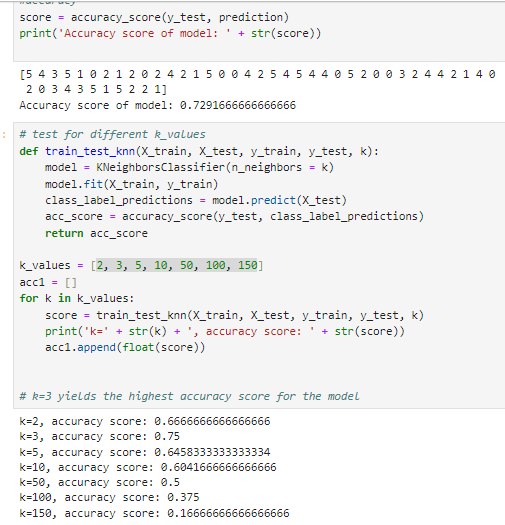


With around a 70% accuracy, the KNN model is ok, but there is much to be improved upon. 

In [39]:
# Trying Decision Tree  model now 
# DT model function 
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth,crit='entropy'):
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth,min_samples_leaf = leaf)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score



max_depth_range = [1,2,3,4,5,10,15,20,25,50,75,100] # hyperparameter range
accDT = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    accDT.append(float(score))


Accuracy scores:
Max Depth=1, accuracy score: 0.2708333333333333
Max Depth=2, accuracy score: 0.6041666666666666
Max Depth=3, accuracy score: 0.9791666666666666
Max Depth=4, accuracy score: 0.9791666666666666
Max Depth=5, accuracy score: 0.9791666666666666
Max Depth=10, accuracy score: 0.9791666666666666
Max Depth=15, accuracy score: 1.0
Max Depth=20, accuracy score: 1.0
Max Depth=25, accuracy score: 0.9791666666666666
Max Depth=50, accuracy score: 0.9791666666666666
Max Depth=75, accuracy score: 1.0
Max Depth=100, accuracy score: 0.9791666666666666


Text(0, 0.5, 'Accuracy')

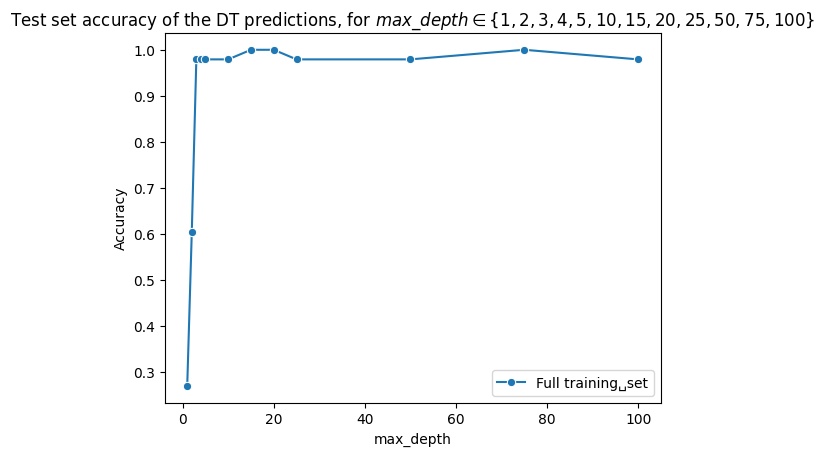

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=accDT, marker='o', label = 'Full training␣set')
plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{1,2,3,4,5,10,15,20,25,50,75,100\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')


In [41]:
# look at feature importance in the data 
Feature_DT_check = DecisionTreeClassifier(min_samples_leaf = 25, max_depth = 20,criterion = 'entropy')
Feature_DT_check.fit(X_train, y_train)
fi = Feature_DT_check.feature_importances_

#sort the most important features
names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse =True)]

names_sorted

['A_M', 'L', 'R', 'Temperature', 'Spectral_Class', 'Color']

In [42]:
#create model with the max depth of 20 
DT_Model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf = 25)
DT_Model.fit(X_train, y_train)
class_label_predictions = DT_Model.predict(X_test)

In [43]:
# save the model using pickle 
pkl_model_filename = "Stars_DT_Model.pkl"
pkl.dump(DT_Model, open(pkl_model_filename, 'wb'))

Screenshots of the DT model results in case of errors when running the file:

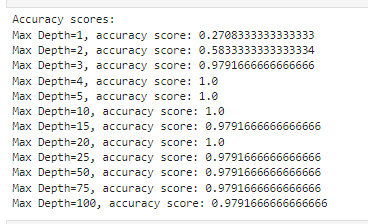

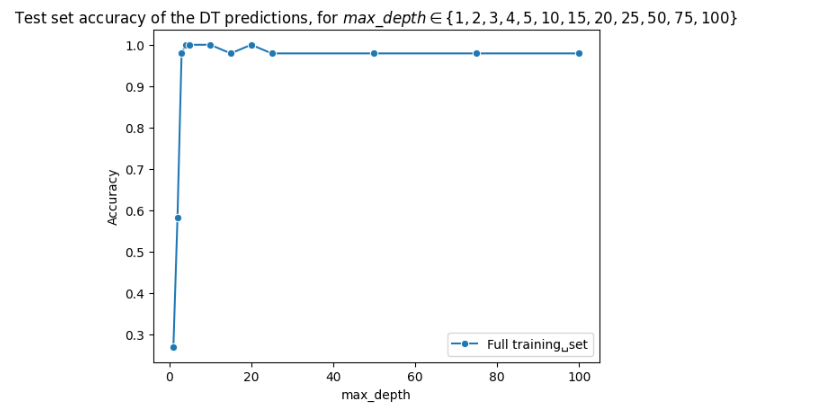


The Decision Tree model has a much higher accuracy than the KNN model, jumping from 70% to 100% for many of the max_depth values. Radius and Actual Magnitude of the stars has the greatest feature importance. 


While the DT model worked well so far, just to try it out, I will also try making a neural network. 

In [44]:
# NN model now 
# resplit data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.40) # this dataset is smaller, so needs more test data 
nnacc = []
nn_model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape = X_train2.shape[1]) # YOUR CODE HERE
nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu') 
nn_model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(units=32, activation='sigmoid') 
nn_model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(units=16, activation='sigmoid') 
nn_model.add(hidden_layer_3)

output_layer = keras.layers.Dense(units=1, activation='softmax')
nn_model.add(output_layer)

nn_model.summary()

sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1) #optimize 
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False) #loss 
nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics=['accuracy'])# compile
num_epochs = 25 # epochs

history = nn_model.fit(X_train2, y_train2, epochs=num_epochs, verbose=0, callbacks =[ProgBarLoggerNEpochs(num_epochs, every_n=5)], validation_split=0.2) # YOUR CODE HERE 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 25], Loss: -29.0837, Accuracy: 0.1826, Val_loss: -38.9679, Val_accuracy: 0.1379
Epoch [10/ 25], Loss: -91.8434, Accuracy: 0.1826, Val_loss: -107.2316, Val_accuracy: 0.1379
Epoch [15/ 25], Loss: -163.5064, Accuracy: 0.1826, Val_loss: -183.32

In [45]:
# save the val_accuracy array to an array 
val_accuracy = history.history.get('val_accuracy', [])
val_accuracy_array = np.array(val_accuracy)


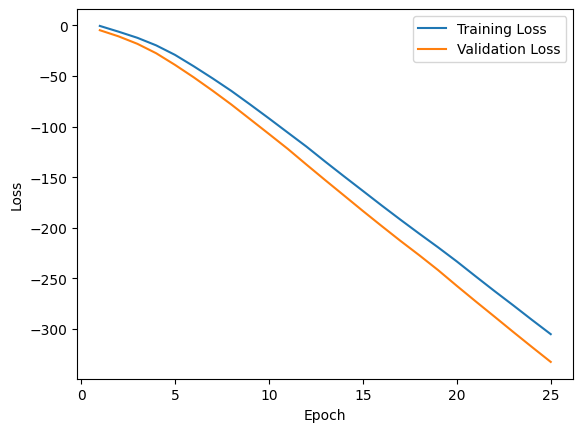

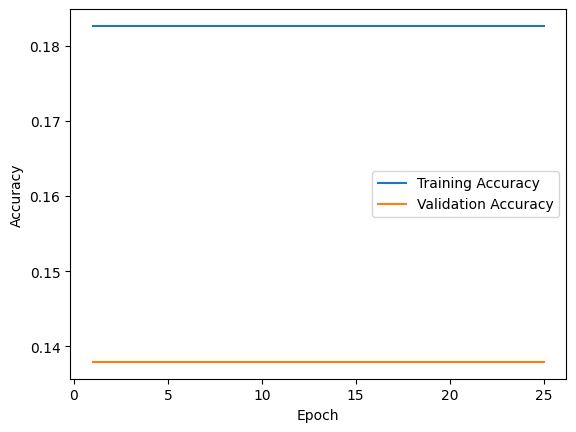

In [46]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Nevermind... with varying values for epoch and different layers, the neural network model is probably not the best fit for the process of classifying the data. This is likely because the data is more simple and has much fewer features and values, which the neural network may struggle with. Overall, the Decision Tree had the best results. For optimizing the neural network, trying different activation functions changed the accuracy, but changing the learning rate did not do too much. Using Relu as the activation function actually decreased the accuracy. Using a combination of Relu, Sigmoid, and Softmax functions seemed to be what changed the data the most. Additionally, 3 layers worked the best as 2 or 4 layers significantly decreased the accuracy scores. Also negative loss values indicate that something is wrong and that the neural network is just not the best fit for this problem due to the few features. 

I will stick with using the Decision Tree and continuing to improve that model. 

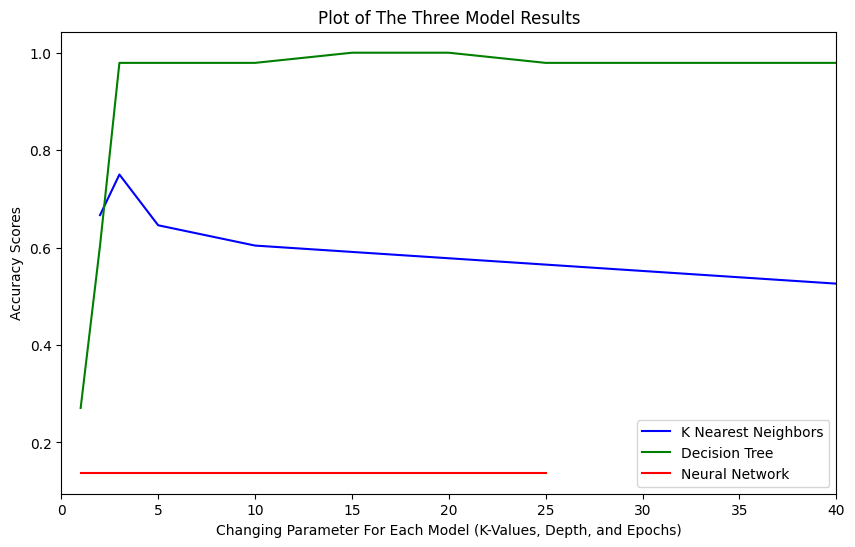

In [47]:
# Final graph to compare all the accuracies of the three models tested

# plot 
plt.figure(figsize=(10, 6))

# KNN DATA 
plt.plot(k_values, acc1, 'blue', label='K Nearest Neighbors')  

# DECISION TREE DATA
plt.plot(max_depth_range, accDT, 'green', label='Decision Tree')  


# NEURAL NETWORK DATA 
plt.plot(range(1, num_epochs + 1), val_accuracy_array, 'red', label='Neural Network') 

plt.xlabel('Changing Parameter For Each Model (K-Values, Depth, and Epochs)')
plt.ylabel('Accuracy Scores')
plt.title('Plot of The Three Model Results')
plt.xlim(0, 40)
plt.legend()

# Show plot
plt.show()

The neural network clearly had the least data and fewest changing parameters which led to a low accuracy overall. K-nearest neighbors worked with a smaller K value, and a decision tree had the highest accuracy for making the predictions of the star types. 